In [555]:
import sys
print(sys.version)

3.7.2 (default, Dec 29 2018, 06:19:36) 
[GCC 7.3.0]


In [556]:
"""
Created on Jan 11 2022
@author: Neven Caplar
@contact: ncaplar@princeton.edu
"""

'\nCreated on Jan 11 2022\n@author: Neven Caplar\n@contact: ncaplar@princeton.edu\n'

In [557]:
%%javascript
try {
  require(['base/js/utils'], function (utils) {
    utils.load_extension('code_prettify/code_prettify');
    utils.load_extension('collapsible_headings/main'); 
    utils.load_extension('codefolding/edit'); 
    utils.load_extension('codefolding/main'); 
    utils.load_extension('execute_time/ExecuteTime'); 
    utils.load_extension('autopep8/main'); 
    utils.load_extension('toc2/main'); 
  });
}
catch (err) {
  console.log('toc2 load error:', err);
}

<IPython.core.display.Javascript object>

In [629]:
# make notebook nice and wide to fill the entire screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
import numpy as np
import scipy
import scipy.optimize
import time
import pandas as pd
import warnings

%matplotlib widget
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.legend_handler import HandlerPatch
np.set_printoptions(suppress=True)
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams['figure.figsize'] = (14, 10)

In [644]:
%load_ext autoreload
%autoreload 2

from optimizeBlackDots import OptimizeBlackDots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import data 

In [657]:
# importing data

# data of the cobras moving in run 1 and run 2
mcs_data_all_1 = np.load('/tigress/ncaplar/PIPE2D-954/mcs_data_all_1.npy')
# take only 40 measurments - 41st was wrongly attached to this file
mcs_data_all_1 = mcs_data_all_1[:,:,:40]
mcs_data_all_2 = np.load('/tigress/ncaplar/PIPE2D-954/mcs_data_all_2.npy')

# positions of the dots
dots = pd.read_pickle("/tigress/ncaplar/PIPE2D-954/dots.pkl")
# original position of the cobras
# only needed for plotting 
getCobraGeometry_cobra_id = pd.read_pickle(
    "/tigress/ncaplar/PIPE2D-954/getCobraGeometry_cobra_id.pkl")

list_of_mcs_data_all = [mcs_data_all_1, mcs_data_all_2]
list_of_descriptions = ['theta', 'phi']
optimize_black_dots_instance = OptimizeBlackDots(dots, list_of_mcs_data_all, list_of_descriptions)

/tigress/HSC/PFS/stack/20190925/python/miniconda3-4.5.12/envs/lsst-scipipe/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/tigress/HSC/PFS/stack/20190925/python/miniconda3-4.5.12/envs/lsst-scipipe/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tigress/HSC/PFS/stack/20190925/python/miniconda3-4.5.12/envs/lsst-scipipe/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/tigress/HSC/PFS/stack/20190925/python/miniconda3-4.5.12/envs/lsst-scipipe/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tigress/HSC/PFS/stack/20190925/python/miniconda3-4.5.12/envs/lsst-scipipe/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of e

/tigress/HSC/PFS/stack/20190925/python/miniconda3-4.5.12/envs/lsst-scipipe/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/tigress/HSC/PFS/stack/20190925/python/miniconda3-4.5.12/envs/lsst-scipipe/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tigress/HSC/PFS/stack/20190925/python/miniconda3-4.5.12/envs/lsst-scipipe/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/tigress/HSC/PFS/stack/20190925/python/miniconda3-4.5.12/envs/lsst-scipipe/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tigress/HSC/PFS/stack/20190925/python/miniconda3-4.5.12/envs/lsst-scipipe/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of e

/tigress/HSC/PFS/stack/20190925/python/miniconda3-4.5.12/envs/lsst-scipipe/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/tigress/HSC/PFS/stack/20190925/python/miniconda3-4.5.12/envs/lsst-scipipe/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tigress/HSC/PFS/stack/20190925/python/miniconda3-4.5.12/envs/lsst-scipipe/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/tigress/HSC/PFS/stack/20190925/python/miniconda3-4.5.12/envs/lsst-scipipe/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tigress/HSC/PFS/stack/20190925/python/miniconda3-4.5.12/envs/lsst-scipipe/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of e

# Example 

In [658]:
res_x=np.array([   0.37076498,   -0.03032379,   -0.00047996,
             0.01258409, -137.18627151,   79.7577389 ])

In [659]:
obs_and_predict_multi = optimize_black_dots_instance.obs_and_predict_multi

In [660]:
# non - improved penalty
penalty_before = optimize_black_dots_instance.optimize_function([0,0,0,0,0,0])
print(penalty_before)

15242.0


In [661]:
# penalty after improvent
penalty_after = optimize_black_dots_instance.optimize_function(res_x)
print(penalty_after)
dots_new = optimize_black_dots_instance.new_position_of_dots(res_x[0], res_x[1], res_x[2],
                                     res_x[3], res_x[4], res_x[5])

4903.0


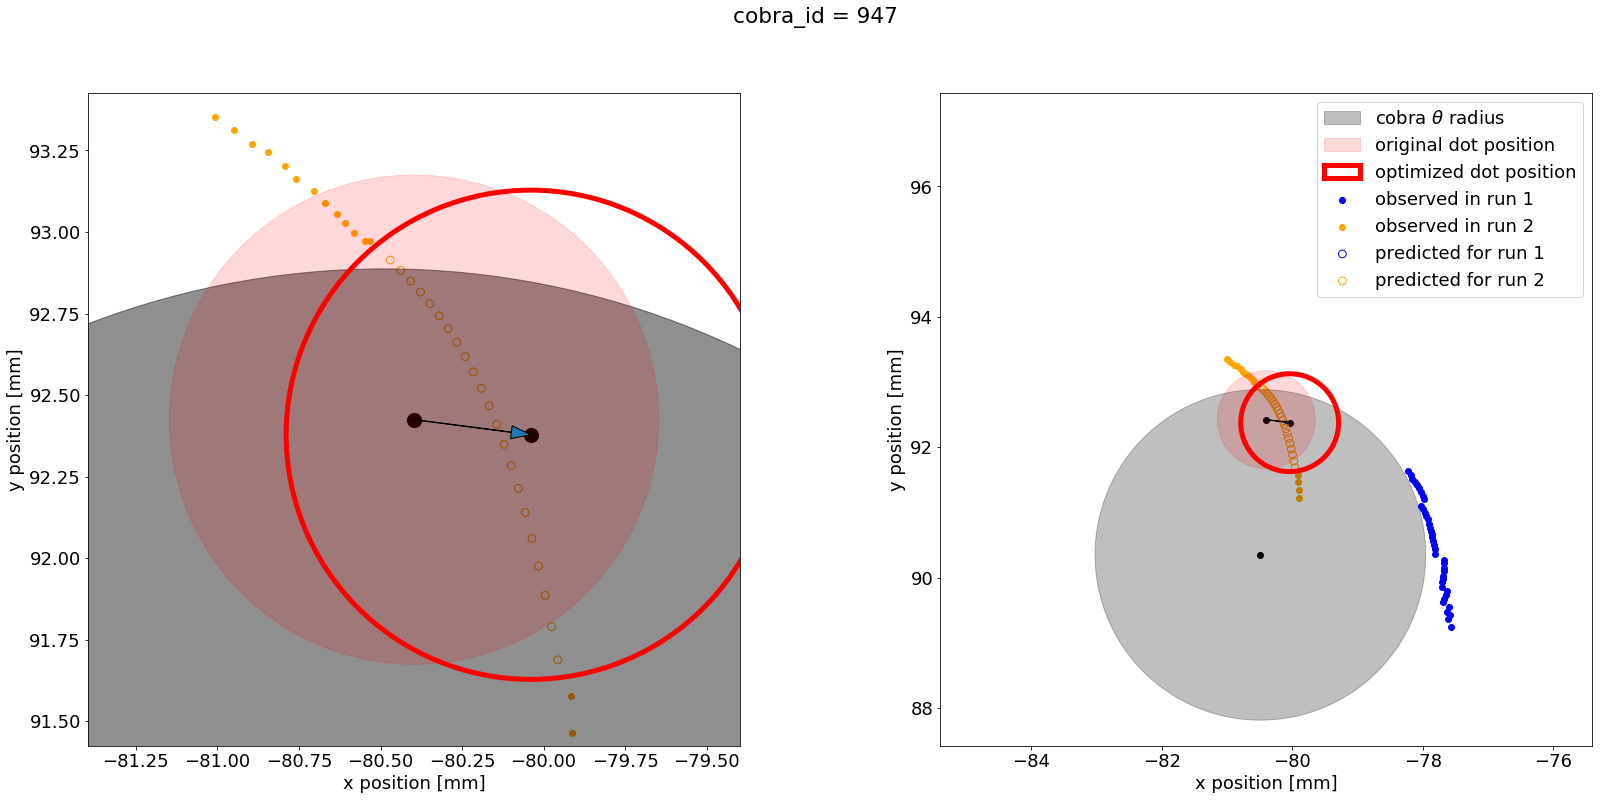

In [664]:
i=947

show_optimization = True
show_predictions = True

isGood_1 = obs_and_predict_multi[0][2][i].astype(bool)
isGood_2 = obs_and_predict_multi[1][2][i].astype(bool)

actual_position_x_1_observed = obs_and_predict_multi[0][0][i][isGood_1]
actual_position_y_1_observed = obs_and_predict_multi[0][1][i][isGood_1]
actual_position_x_2_observed = obs_and_predict_multi[1][0][i][isGood_2]
actual_position_y_2_observed = obs_and_predict_multi[1][1][i][isGood_2]

predicted_position_x_1_not_observed = obs_and_predict_multi[0][0][i][~isGood_1]
predicted_position_y_1_not_observed = obs_and_predict_multi[0][1][i][~isGood_1]
predicted_position_x_2_not_observed = obs_and_predict_multi[1][0][i][~isGood_2]
predicted_position_y_2_not_observed = obs_and_predict_multi[1][1][i][~isGood_2]

xd_original, yd_original = dots.iloc[i-1][['x','y']].values
xd_modified, yd_modified = dots_new.iloc[i-1][['x','y']].values

%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})
plt.rcParams["figure.facecolor"] = "white"

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28,12))
fig.suptitle(f'cobra_id = {i}') 

data1 = ax1.scatter(mcs_data_all_1[0, i][:40], mcs_data_all_1[1, i][:40], color='blue', label='observed in run 1')
# ax1.plot(poly_deg_x_1(np.arange(0,40)), poly_deg_y_1(np.arange(0,40)), color='blue')
ax1.scatter(mcs_data_all_2[0, i][:40], mcs_data_all_2[1, i][:40], color='orange')
# ax1.plot(poly_deg_x_2(np.arange(0, len(y_measurments_2))), poly_deg_y_2(np.arange(0,len(y_measurments_2))), color='orange')

ax1.scatter(getCobraGeometry_cobra_id.loc[i]['center_x_mm'], getCobraGeometry_cobra_id.loc[i]['center_y_mm'], color = 'black')
cc_cobra = Circle((getCobraGeometry_cobra_id.loc[i]['center_x_mm'], getCobraGeometry_cobra_id.loc[i]['center_y_mm']), 
               getCobraGeometry_cobra_id.loc[i]['motor_theta_length_mm'], color='black' , alpha=0.25,label='theta radius')
ax1.add_artist(Circle((getCobraGeometry_cobra_id.loc[i]['center_x_mm'], getCobraGeometry_cobra_id.loc[i]['center_y_mm']), 
              getCobraGeometry_cobra_id.loc[i]['motor_theta_length_mm'], color='black' , alpha=0.25,label='theta radius'))
ax1.scatter(xd_original, yd_original, color='black',s=200)
if show_optimization:
    ax1.scatter(xd_modified, yd_modified, color='black',s=200)

cc_original = Circle((xd_original, yd_original), 0.75, color='red', alpha=0.15, label='original dot position')
cc_modified = Circle((xd_modified, yd_modified), 0.75, color='red' , alpha=1, label='optimized dot position', fill=False, lw=5)

ax1.set_aspect(1) 
ax1.add_artist(cc_cobra) 
ax1.add_artist(cc_original)
if show_optimization:
    ax1.add_artist(cc_modified) 

if show_predictions:
    ax1.scatter(predicted_position_x_1_not_observed, predicted_position_y_1_not_observed, s=60, facecolors='none', edgecolors='blue')
    ax1.scatter(predicted_position_x_2_not_observed, predicted_position_y_2_not_observed , s=60, facecolors='none', edgecolors='orange')
if show_optimization:
    ax1.arrow(xd_original, yd_original, xd_modified-xd_original, yd_modified-yd_original, head_width = 0.04, length_includes_head = True)

#ax1.title( 'cobra_id = ' + str(i) ) 
ax1.set_ylim(yd_original-1, yd_original+1)
ax1.set_xlim(xd_original-1, xd_original+1)
ax1.set_xlabel('x position [mm]')
ax1.set_ylabel('y position [mm]')

cc_cobra = Circle((getCobraGeometry_cobra_id.loc[i]['center_x_mm'], getCobraGeometry_cobra_id.loc[i]['center_y_mm']), 
              getCobraGeometry_cobra_id.loc[i]['motor_theta_length_mm'], color='black' , alpha=0.25, label=r'cobra $\theta$ radius')
cc_original = Circle((xd_original, yd_original), 0.75, color='red', alpha=0.15, label='original dot position')
cc_modified = Circle((xd_modified, yd_modified), 0.75, color='red' , alpha=1, label='optimized dot position', fill=False, lw=5)

ax2.scatter(getCobraGeometry_cobra_id.loc[i]['center_x_mm'], getCobraGeometry_cobra_id.loc[i]['center_y_mm'], color='black')
ax2.scatter(xd_original, yd_original, color='black')
if show_optimization:
    ax2.scatter(xd_modified, yd_modified, color='black')

ax2.set_aspect(1) 
ax2.add_artist(cc_cobra) 
ax2.add_artist(cc_original)
if show_optimization:
    ax2.add_artist(cc_modified) 

data1 = ax2.scatter(mcs_data_all_1[0, i][:40], mcs_data_all_1[1, i][:40], color='blue', label='observed in run 1')
# ax2.plot(poly_deg_x_1(np.arange(0,40)), poly_deg_y_1(np.arange(0,40)), color='blue')
data2 = ax2.scatter(mcs_data_all_2[0, i][:40], mcs_data_all_2[1, i][:40], color='orange', label='observed in run 2')
# ax2.plot(poly_deg_x_2(np.arange(0,len(y_measurments_2))), poly_deg_y_2(np.arange(0,len(y_measurments_2))), color='orange')
if show_predictions:
    predicted1 = ax2.scatter(predicted_position_x_1_not_observed, predicted_position_y_1_not_observed, s=60, facecolors='none', edgecolors='blue', label='predicted for run 1')
    predicted2 = ax2.scatter(predicted_position_x_2_not_observed, predicted_position_y_2_not_observed, s=60, facecolors='none', edgecolors='orange', label='predicted for run 2')

if show_optimization:
    ax2.arrow(xd_original, yd_original, xd_modified-xd_original, yd_modified-yd_original, head_width = 0.04, length_includes_head = True)

#plt.title( 'cobra_id = ' + str(i) ) 
ax2.set_ylim(yd_original-5, yd_original+5)
ax2.set_xlim(xd_original-5, xd_original+5)
ax2.set_xlabel('x position [mm]')
ax2.set_ylabel('y position [mm]')

ax2.legend(handles = [cc_cobra, cc_original, cc_modified, data1, data2, predicted1, predicted2])

# Optimize the solution 

In [666]:
res_x = np.array([ 0.36026105,   -0.0107773 ,   -0.00046232,    0.01466045,
       -145.61356451,   66.34897886])

In [667]:
# search for the solution which will minimize the totaly penalty
# it moves the dots so that it minimizes the number of 
# spots that are seen while they shouldnt been seen
# and spots that are not seen, while they should have been seen

# put in some reasonable bounds for the search
bounds = np.array([(-0.5,0.5), (-0.5,0.5), (-0.005,0.005), (-0.2,0.2), (-200,200), (-200,200)])
# spawn the initial simples to search for the solutions
init_simplex = np.zeros((7, 6))
for l in range(1,7):
    init_simplex[l] = bounds[:, 0]+(bounds[:, 1]-bounds[:, 0])*np.random.random_sample(size=6)  
init_simplex[0]=[  0.25872801,   -0.00891047,   -0.00053464,    0.01497597,
       -121.9728775 ,   64.57514016]

# simple Nelder-Mead will do sufficently good job
t1 = time.time()
res = scipy.optimize.minimize(optimize_black_dots_instance.optimize_function, x0=init_simplex[0],
                              method='Nelder-Mead', options={'maxiter':1000, 'initial_simplex':init_simplex})
t2 = time.time()
time_for_minimization = t2 - t1
print('Time for minimization is {} seconds'.format(t2-t1))

Time for minimization is 51.95385980606079 seconds


In [668]:
# compare the optimized results with the non-optimized result
test_dots_survived,list_of_total_penalty_for_single_dot_original = optimize_black_dots_instance.optimize_function([0., 0., 0., 0., 0., 0.],True)
test_dots_survived_optimized,list_of_total_penalty_for_single_dot_optimized = optimize_black_dots_instance.optimize_function(res.x, True)

list_of_total_penalty_for_single_dot_original = np.sum(list_of_total_penalty_for_single_dot_original,axis=1)
list_of_total_penalty_for_single_dot_optimized = np.sum(list_of_total_penalty_for_single_dot_optimized
                                                        ,axis=1)
xd_original_test_dots_survived = dots['x']
yd_original_test_dots_survived = dots['y']

cmap = matplotlib.cm.get_cmap('jet')
colors_orignal = cmap(np.array(list_of_total_penalty_for_single_dot_original)/15)
colors_optimized  = cmap(np.array(list_of_total_penalty_for_single_dot_optimized)/15)
# overloading the definition for cmap
cmap = matplotlib.cm.get_cmap('bwr')
colors_difference=cmap(np.array(list_of_total_penalty_for_single_dot_original)/15-\
                           np.array(list_of_total_penalty_for_single_dot_optimized)/15+0.5)


Text(0.5, 1.0, 'Improvment due to optimization')

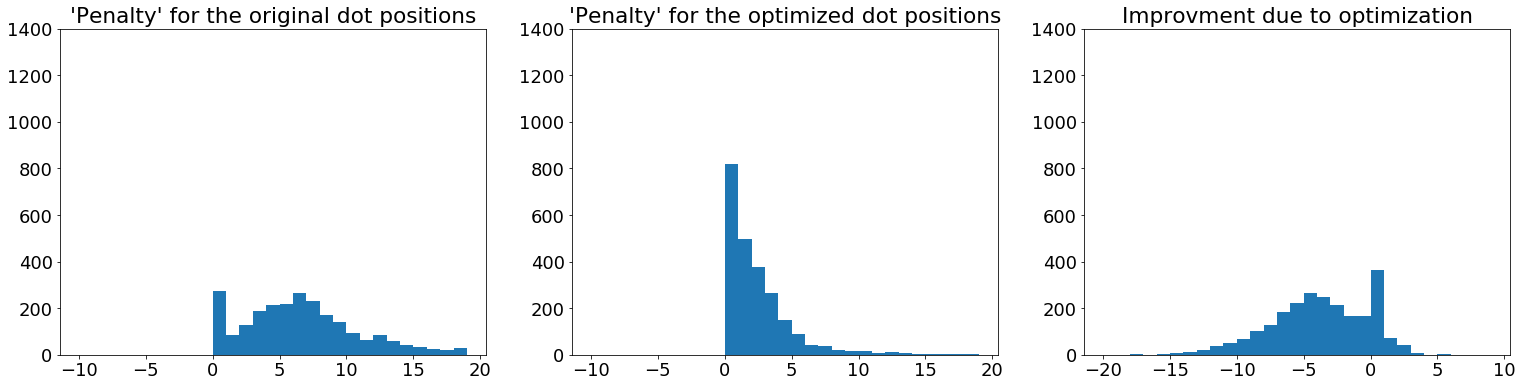

In [669]:
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})
plt.rcParams["figure.facecolor"] = "white"

figure, axes = plt.subplots(figsize=(26,6))
plt.subplot(131)
plt.hist(np.array(np.array(list_of_total_penalty_for_single_dot_original)),bins=np.arange(-10,20,1))
plt.title("'Penalty' for the original dot positions")
plt.ylim(0,1400)
plt.subplot(132)
plt.hist(np.array(list_of_total_penalty_for_single_dot_optimized),bins=np.arange(-10,20,1))
plt.title("'Penalty' for the optimized dot positions")
plt.ylim(0,1400)
plt.subplot(133)
plt.hist(-np.array(np.array(list_of_total_penalty_for_single_dot_original)
                           -np.array(list_of_total_penalty_for_single_dot_optimized)),bins=np.arange(-20,10,1))
plt.ylim(0,1400)
plt.title("Improvment due to optimization")
# in the final plot, on the right hand side,
# positive numbers are bad, negative values are good

Text(0.5, 0, 'x position [mm]')

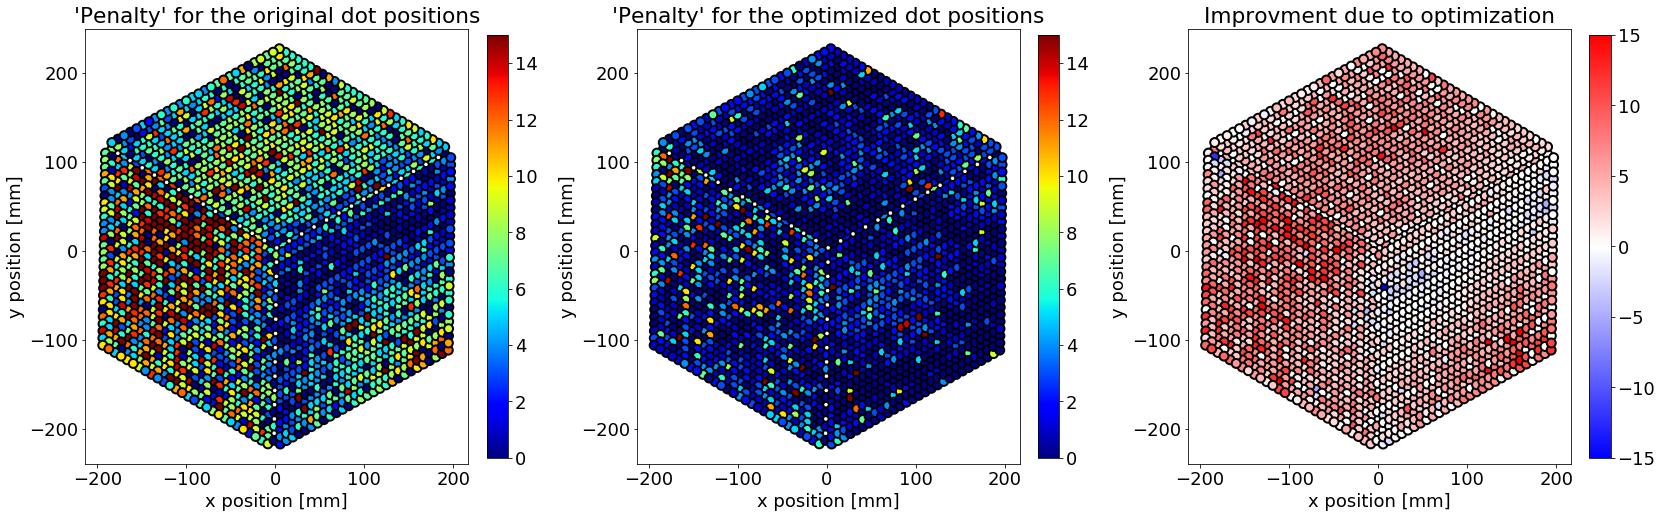

In [670]:
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})
plt.rcParams["figure.facecolor"] = "white"
figure = plt.figure(figsize=(28, 8))

plt.subplot(131)
plt.title("'Penalty' for the original dot positions")
sc = plt.scatter(xd_original_test_dots_survived, yd_original_test_dots_survived,
                 s=80, c=np.array(list_of_total_penalty_for_single_dot_original),
                 lw=2, edgecolors='black', cmap = matplotlib.cm.get_cmap('jet'), vmax=15)
plt.colorbar(sc, fraction=0.046, pad=0.04)
plt.gca().set_aspect('equal')
plt.ylabel('y position [mm]')
plt.xlabel('x position [mm]')

plt.subplot(132)
plt.title("'Penalty' for the optimized dot positions")
sc2 = plt.scatter(xd_original_test_dots_survived, yd_original_test_dots_survived,
                  s=80, c=np.array(list_of_total_penalty_for_single_dot_optimized),
                  lw=2, edgecolors='black', cmap = matplotlib.cm.get_cmap('jet'), vmax=15)
plt.gca().set_aspect('equal')
plt.colorbar(sc2, fraction=0.046, pad=0.04)
plt.ylabel('y position [mm]')
plt.xlabel('x position [mm]')

plt.subplot(133)
plt.title("Improvment due to optimization")
sc3 = plt.scatter(xd_original_test_dots_survived, yd_original_test_dots_survived,
                  s=80, c=np.array(list_of_total_penalty_for_single_dot_original)/1-\
                  np.array(list_of_total_penalty_for_single_dot_optimized)/1, lw=2,
                  edgecolors='black', cmap=matplotlib.cm.get_cmap('bwr'), vmax=15, vmin=-15)
plt.gca().set_aspect('equal')
plt.colorbar(sc3, fraction=0.046, pad=0.04)
plt.ylabel('y position [mm]')
plt.xlabel('x position [mm]')

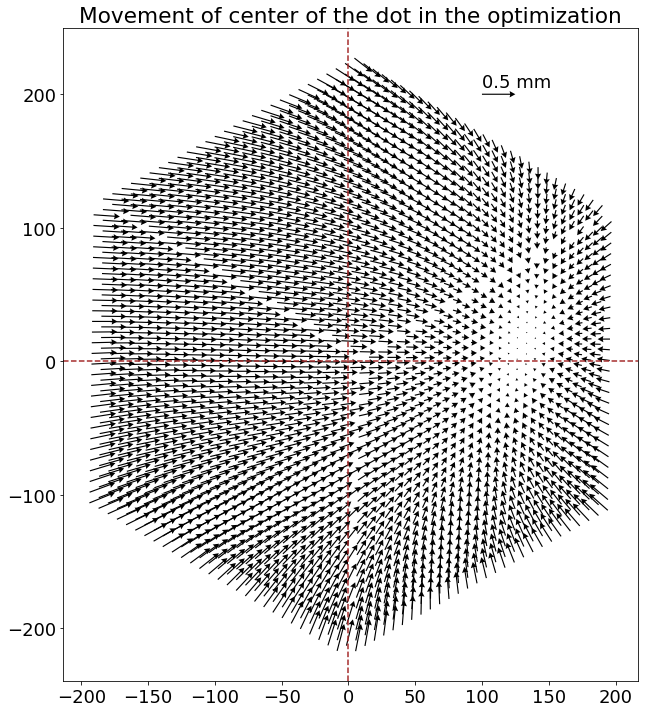

In [671]:
list_of_change = []


xd_original = dots['x']
yd_original = dots['y']

xd_new = dots_new['x']
yd_new = dots_new['y']

list_of_change.append([np.array((xd_original, yd_original)),
                       np.array((xd_new, yd_new)) - np.array((xd_original, yd_original))])

array_of_change = np.array(list_of_change)

plt.rcParams["figure.facecolor"] = "white"
plt.figure(figsize=(12, 12))
plt.quiver(array_of_change[:, 0][:, 0], array_of_change[:, 0][:, 1], +array_of_change[:, 1][:, 0], array_of_change[:, 1][:, 1],
           units='width', angles='xy', scale_units='xy', scale=0.02, width=0.002, headwidth=5.5)

plt.quiver(100, 200, 0.5, 0,
           units='width', angles='xy', scale_units='xy', scale=0.02, width=0.002, headwidth=5.5)
plt.title("Movement of center of the dot in the optimization")
plt.text(100, 205, s='0.5 mm')
plt.axvline(0, color='brown', ls='--')
plt.axhline(0, color='brown', ls='--')
plt.gca().set_aspect('equal')